In [89]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
from highlight_text import ax_text, fig_text
import pandas as pd

from PIL import Image
import urllib
import os

# --- Use this only if you have already downloaded fonts into your
# --- local directory.

# Add pretty fonts

# font_path = r"" #Set the path to where the fonts are located

# for x in os.listdir(font_path):
#     for y in os.listdir(f"{font_path}/{x}"):
#         if y.split(".")[-1] == "ttf":
#             fm.fontManager.addfont(f"{font_path}/{x}/{y}")
#             try:
#                 fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y)
#             except Exception as e:
#                 print(f"Font {y} could not be added.")
#                 continue

# rcParams['font.family'] = 'Karla'

spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
from mplsoccer import FontManager
monoBFont = FontManager(spaceMono_bold)

In [110]:
# --- Reading the data
df = pd.read_csv("/work/assets/fbref/leagueStats/liga/2122/misc.csv", encoding = "utf-8", index_col = 0)
df = df[df["90s"] >= 5]
df = df[df["Fls_Performance"] >= 5]

# -- Highlighted players.
players = [
    "Gavi","Gavi Paez","Robert Lewandowski","Pedri",
    "Frenkie de Jong","Raphinha","Ferrán Torres",
    "Jordi Alba","Nicolás González","Koke","Ilaix Moriba",
    "Sergio Busquets"
]
df["cards_per_fouls"] = (df["CrdY_Performance"] + df["CrdR_Performance"]) / df['Fls_Performance']
df["fouls_per_90"] = df['Fls_Performance'] / df["90s"]

In [111]:
df_main = df[~df["Player"].isin(players)].reset_index(drop = True)
df_highlight = df[df["Player"].isin(players)].reset_index(drop = True)
# df_main[df_main["cards_per_fouls"]>]
# df_main[(df_main["fouls_per_90"]>=2)&(df_main["cards_per_fouls"]>=.4)][["Player","Fls_Performance","cards_per_fouls","CrdY_Performance","CrdR_Performance"]]

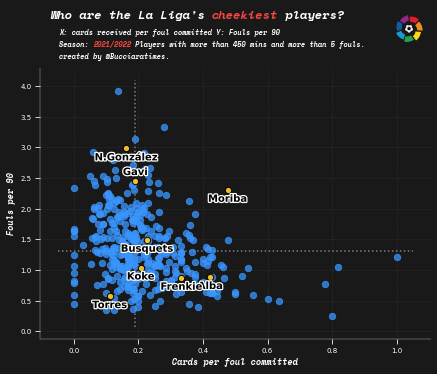

In [112]:
# -- Plot the chart
fig, ax = plt.subplots(figsize = (7,5))
fig.set_facecolor("#191919")
ax.set_facecolor("#191919")   

ax.tick_params(colors="w", length=5, left=True, bottom=True, labelsize=7, labelbottom=True, labelleft=True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color("#FFFFFF")
ax.spines['bottom'].set_linewidth(.3)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#FFFFFF")
ax.spines['left'].set_linewidth(.3)

ax.scatter(
    df_main["cards_per_fouls"], 
    df_main["fouls_per_90"], 
    s = 40, 
    alpha = 0.75, 
    color = "#3A96FF",
    zorder = 3
)
ax.scatter(
    df_highlight["cards_per_fouls"], 
    df_highlight["fouls_per_90"], 
    s = 40, 
    alpha = 0.95, 
    color = "#fdc526",
    zorder = 3,
    ec = "#000000",
)

ax.plot(
    [df["cards_per_fouls"].median(), df["cards_per_fouls"].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "gray",
    zorder = 2
)
ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [df["fouls_per_90"].median(), df["fouls_per_90"].median()], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.grid(ls=':', color='#333333')

for index, name in enumerate(df_highlight["Player"]):
    X = df_highlight["cards_per_fouls"].iloc[index]
    Y = df_highlight["fouls_per_90"].iloc[index]
    if name in ["Gavi", " Joelinton", " Richarlison", "Alexandre Lacazette"]:
        y_pos = 9
    else:
        y_pos = -9
    if name in ["Scott McTominay"]:
        x_pos = 20
    else:
        x_pos = 0
    if name in ["Frenkie de Jong"]:
        name = "Frenkie"
    if name in ["Nicolás González"]:
        name = "N.González"
    if name in ["Gavi Paez"]:
        name = "Gavi"
    text_ = ax.annotate(
        xy = (X, Y),
        text = name.split(" ")[1] if " " in name else name,
        ha = "center",
        va = "center",
        xytext = (x_pos, y_pos),
        textcoords = "offset points",
        weight = "bold"
    )

    text_.set_path_effects(
                [path_effects.Stroke(linewidth=2.5, foreground="white"), 
                path_effects.Normal()]
    )
ax.set_xlabel("Cards per foul committed", fontdict={"color":"#FFFFFF", "fontsize":8.5, "fontproperties":monoBFont.prop})
ax.set_ylabel("Fouls per 90", fontdict={"color":"#FFFFFF", "fontsize":8.5, "fontproperties":monoBFont.prop})

fig_text(
    x = 0.73, y = 1.01, 
    s = "Who are the La Liga's <cheekiest> players?",
    highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 12, color = "white", fontproperties=monoBFont.prop, weight = "bold"
)

fig_text(
	x = 0.77, y = .9, 
    s = "X: cards received per foul committed Y: Fouls per 90\nSeason: <2021/2022> Players with more than 450 mins and more than 5 fouls.\ncreated by @Bucciaratimes.",
	highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
	fontsize = 7, color = "#FFFFFF", fontproperties=monoBFont.prop
)

fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
logo_ax = fig.add_axes(
    [.82, .95, .075, .075]
)
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{87:.0f}.png')).convert('RGBA') # 白黒：LA
logo_ax.imshow(club_icon)
logo_ax.axis('off')

import random
plt.savefig(f'/work/output/{random.uniform(100,1000)}.png', dpi=250, bbox_inches="tight",facecolor="#191919")